In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from astropy.time import Time
import plotly.express as px


In [2]:
test_df = pd.read_csv("aocs_and_dms_edac_cntr/2004_q2/ros_hk_nacw0d0a_2004_q2.tab",
                      names=["time", "edac_count"])

In [3]:
test_df

,time,edac_count
0,2004-04-01T00:03:26.974,769
1,2004-04-01T00:07:42.974,769
2,2004-04-01T00:11:58.974,769
3,2004-04-01T00:16:14.974,769
4,2004-04-01T00:20:30.975,769
...,...,...
25802,2004-06-30T23:17:57.978,18133
25803,2004-06-30T23:26:29.978,18133
25804,2004-06-30T23:35:01.978,18133
25805,2004-06-30T23:43:33.978,18133


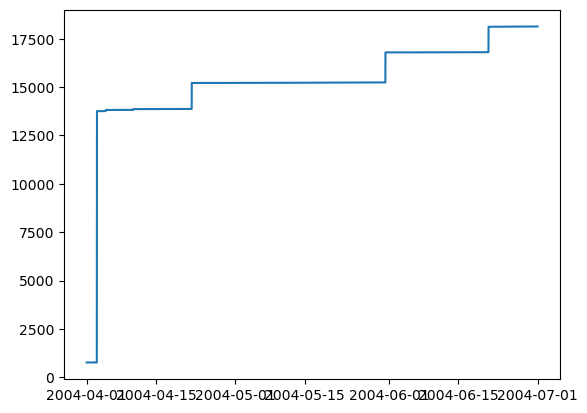

In [4]:
plt.plot(Time(test_df["time"].values.astype("U"),format='isot', scale='utc').to_datetime(),
         test_df["edac_count"].values)

In [5]:
def load_all_data():
    all_files = sorted(glob("aocs_and_dms_edac_cntr/*/ros_hk_nacw0d0a*.tab"))
    dfs = []
    for file in all_files:
        df = pd.read_csv(file, names=["time", "edac_count"])
        df["time"] = pd.to_datetime(df["time"].values.astype("U"))
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [6]:
edac_df = load_all_data()

In [7]:
edac_df

,time,edac_count
0,2004-03-02 04:05:16.121,0
1,2004-03-02 04:05:32.121,0
2,2004-03-02 04:05:48.122,0
3,2004-03-02 04:06:06.118,0
4,2004-03-02 04:10:22.118,0
...,...,...
636886,2016-09-30 10:00:53.611,1073
636887,2016-09-30 10:09:25.612,1073
636888,2016-09-30 10:17:57.612,1073
636889,2016-09-30 10:26:29.612,1073


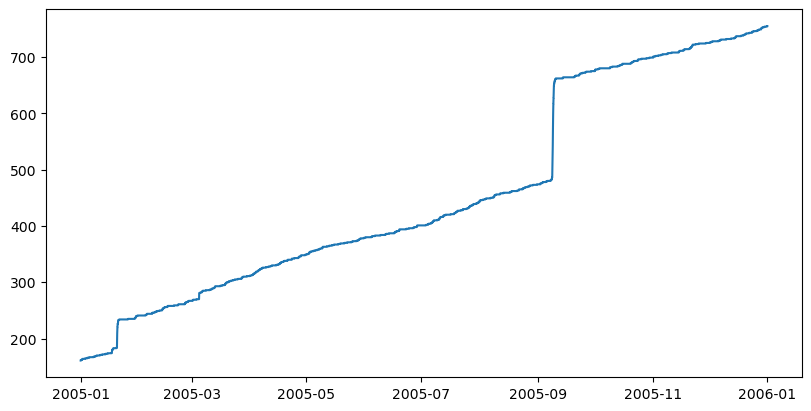

In [8]:
mask = (edac_df["time"] < pd.Timestamp("2006-01-01")) & (edac_df["time"] >= pd.Timestamp("2005-01-01"))
fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.plot(edac_df[mask]["time"].values,
         edac_df[mask]["edac_count"].values)


In [9]:
change_frame = (edac_df["edac_count"].values[1:] != edac_df["edac_count"].values[:-1])
key_frame = np.r_[True, change_frame] | np.r_[change_frame, True]

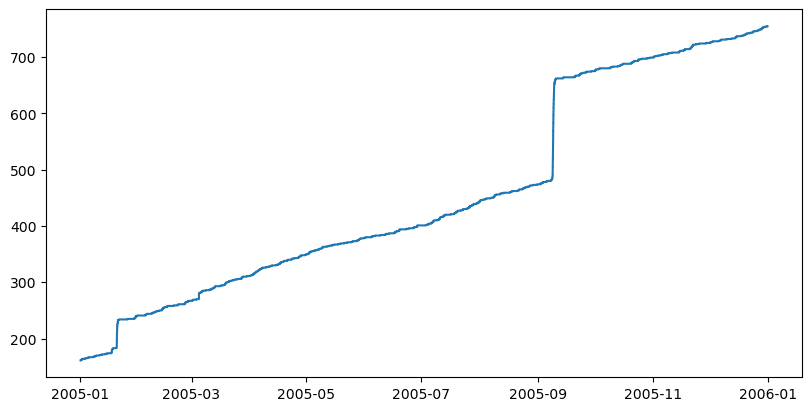

In [10]:
edac_df_key = edac_df[key_frame]
mask_key = ((edac_df_key["time"] < pd.Timestamp("2006-01-01")) & (edac_df_key["time"] >= pd.Timestamp("2005-01-01")))

fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.step(edac_df_key[mask_key]["time"].values,
         edac_df_key[mask_key]["edac_count"].values,
         where="mid")

Text(0.5, 1.0, 'Rosetta AOCS and DMS EDAC Counter')

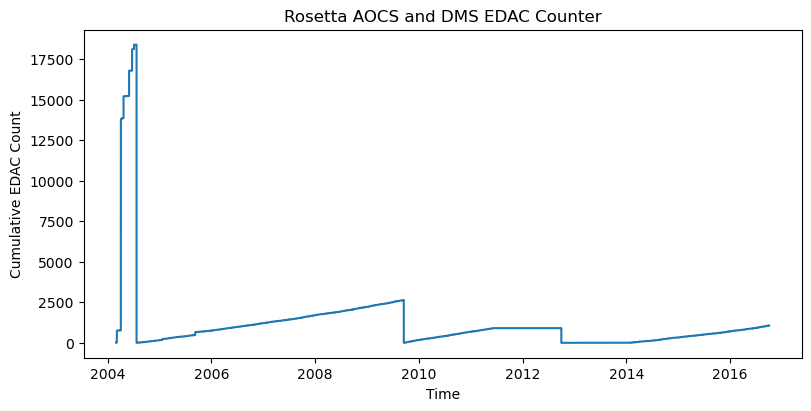

In [11]:
fig, ax = plt.subplots(figsize=(8,4), layout="constrained")
ax.step(edac_df_key["time"].values,
         edac_df_key["edac_count"].values,
         where="mid")
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative EDAC Count")
ax.set_title("Rosetta AOCS and DMS EDAC Counter")

In [12]:
mask_pre_2006 = edac_df_key["time"] < pd.Timestamp("2006-01-01")
fig_plotly = px.line(edac_df_key[mask_pre_2006], x="time", y="edac_count",
                     labels={"time": "Time", "edac_count": "Cumulative EDAC Count"},
                     title="Rosetta AOCS and DMS EDAC Counter")
fig_plotly.update_layout(width=1024, height=768)
fig_plotly.write_html("edac_counter_plot.html", include_plotlyjs="cdn")


In [13]:
edac_df_key

,time,edac_count
0,2004-03-02 04:05:16.121,0
47,2004-03-02 07:13:50.121,0
48,2004-03-02 09:38:54.134,40
49,2004-03-02 09:43:10.134,42
1041,2004-03-04 06:18:22.228,42
...,...,...
636658,2016-09-28 23:52:53.573,1071
636659,2016-09-29 00:01:25.573,1072
636746,2016-09-29 12:23:49.588,1072
636747,2016-09-29 12:32:21.589,1073
